# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the downloaded file in pandas
df_tweet_archive_enhanced = pd.read_csv('./data/twitter-archive-enhanced.csv')

In [3]:
# display a sample of the data
df_tweet_archive_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# import requests and os packages
import requests
import os

In [5]:
#create a data folder to store the downloaded data files
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [6]:
# specify url of the file to download
file_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [7]:
#define a function that takes in the url of a file and downloads it to the data folder
def download_file(file_link):
    response = requests.get(file_link)
    with open(os.path.join(folder_name, file_link.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [8]:
#call the function to download the file
download_file(file_url)

In [9]:
# check the contents of the data folder to confirm the file has been downloaded
!ls ./data

image-predictions.tsv	twitter-archive-enhanced.csv
tweet_json_fetched.txt	twitter_archive_master.csv


In [10]:
#read the downloaded file in pandas
df_image_predictions = pd.read_csv('./data/image-predictions.tsv', sep='\t')

In [11]:
# display a sample of the data
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [12]:
#import packages
from tqdm import tqdm
import tweepy
import json
from timeit import default_timer as timer

In [13]:
# # create an API object that will be used to get Twitter data
# consumer_key = 'CONSUMER_KEY'
# consumer_secret = 'CONSUMER_SECRET'
# access_token = 'ACCESS_TOKEN'
# access_secret = 'ACCESS_SECRET'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [14]:
# # get the tweet_ids for which to querry retweet count and favourite count from Twitter API
# tweet_ids = df_tweet_archive_enhanced['tweet_id'].values

In [15]:
# def get_tweets(tweet_ids):
#     '''
#     Function that gets tweets given a list of tweet_ids and 
#     then writes them to a txt file.
    
#     This function also prints out the time taken to run as well as a 
#     dictionary of tweet ids whose tweets were not fetched and the TweepError.
#     '''
#     start_time = timer()
#     error_tweets = {}
#     with open('./data/tweet_json_fetched.txt', 'w') as tweet_file:
#         for tweet_id in tqdm(tweet_ids, desc='fetching tweets...'):
#             try:
#                 tweet = api.get_status(tweet_id, tweet_mode='extended')
#                 json.dump(tweet._json, tweet_file)
#                 tweet_file.write('\n')
#             except tweepy.TweepError as e:
#                 error_tweets[tweet_id] = e
#             pass
#     end_time = timer()
#     print(f'time taken: {end_time - start_time}')
#     print(f'tweet_ids with errors: {error_tweets}') 

In [16]:
# call the function to get tweets by passing in the tweet ids
# get_tweets(tweet_ids)

In [17]:
#read the tweets from the file fetched into a pandas dataframe
tweet_data = []
with open('./data/tweet_json_fetched.txt', 'r') as tweet_file:
    for tweet_line in tweet_file:
        tweet = json.loads(tweet_line)
        tweet_data.append({'tweet_id': tweet['id'], 'retweet_count': tweet['retweet_count'], 'favorite_count': tweet['favorite_count']})
        df_tweet_json = pd.DataFrame(tweet_data)

In [18]:
#display a sample of the data
df_tweet_json.head()

,favorite_count,retweet_count,tweet_id
0,33829,7010,892420643555336193
1,29340,5302,892177421306343426
2,22069,3482,891815181378084864
3,36955,7228,891689557279858688
4,35323,7765,891327558926688256


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### i) visual assessment

- display the data to assess it visually

In [19]:
df_tweet_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
15,889278841981685760,NaN,NaN,2017-07-24 00:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
928,754747087846248448,NaN,NaN,2016-07-17 18:38:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's pursuing a more 2D lifesty...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754747087...,12,10,Keith,None,None,None,None
1461,694925794720792577,NaN,NaN,2016-02-03 16:49:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please only send in dogs. This t-rex is very s...,NaN,NaN,NaN,https://vine.co/v/iJvUqWQ166L,5,10,None,None,None,None,None


In [20]:
df_image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
305,671520732782923777,https://pbs.twimg.com/media/CVG4i9UWEAAUH3U.jpg,1,Pomeranian,0.551031,True,Pekinese,0.135262,True,gibbon,0.061557,False
667,682962037429899265,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
64,667171260800061440,https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg,1,giant_schnauzer,0.841265,True,Lakeland_terrier,0.052744,True,Irish_water_spaniel,0.034402,True
1822,834786237630337024,https://pbs.twimg.com/media/C5XBp19WYAA5a_v.jpg,1,Border_terrier,0.156276,True,Norwegian_elkhound,0.125912,True,Boston_bull,0.096624,True
941,704054845121142784,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True


In [21]:
df_tweet_json.sample(5)

,favorite_count,retweet_count,tweet_id
2169,494,227,668815180734689280
931,11751,5398,751251247299190784
2039,823,344,671138694582165504
1925,650,199,673656262056419329
1804,1755,593,676146341966438401


### ii) programatic assessment 

In [22]:
# display information about the tweet_archive_enhanced data
df_tweet_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
# describe numeric columns in the tweet_archive_enhanced data
df_tweet_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
# get the number of rows and columns in the tweet_archive_enhanced data
df_tweet_archive_enhanced.shape

(2356, 17)

In [25]:
# display information about the image_predictions data
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
# describe numeric columns in the image_predictions data
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
# get the number of rows and columns in the image_predictions data
df_image_predictions.shape

(2075, 12)

In [28]:
# display information about the tweet_json data
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
tweet_id          2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [29]:
# describe numerical columns in tweet_json dat
df_tweet_json.describe()

,favorite_count,retweet_count,tweet_id
count,2327.000000,2327.000000,2.327000e+03
mean,7057.870649,2472.371723,7.417930e+17
std,10967.495301,4187.041698,6.820795e+16
min,0.000000,1.000000,6.660209e+17
25%,1226.000000,495.000000,6.781394e+17
50%,3053.000000,1149.000000,7.178418e+17
75%,8610.500000,2863.500000,7.986547e+17
max,144954.000000,70786.000000,8.924206e+17


In [30]:
# get number of rows and columns in the tweet_json data
df_tweet_json.shape

(2327, 3)

In [31]:
df_tweet_archive_enhanced.isna().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [32]:
# function to get columns with missing values
def check_na(df):
    print(df.isna().sum())

In [33]:
# check tweet_archive_enhanced data for missing values
check_na(df_tweet_archive_enhanced)

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64


In [34]:
#check image_predictions data for missing values
check_na(df_image_predictions)

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64


In [35]:
# check tweet_json data for missing values
check_na(df_tweet_json)

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64


### Quality issues

#### - Quality issues identified in the `tweet_archive_enhanced` data:


1. The data contains retweets that should not be considered in the analysis as we only want original tweet ratings with images.


2. `timestamp` column has string datatype instead of datetime.


3. `tweet_id` column is of integer instead of string datatype.


4. `rating_denominator` has some values that are not equal to 10 as per the unique rating system.


5. `rating_numerator` has some values that are over 15 and not consistent with the [rating system](https://15outof10.org/our-story/#:~:text=the%2015/10%20Foundation%2C%20named%20for%20the%20highest%20rating%20any%20dog%20has%20ever%20received%20on%20WeRateDogs)


6. Invalid values the `name` column e.g: `the`, `an`, `a` e.t.c


7. Missing values in `name` column labelled as `None` need to be converted to `NaN` 



#### - Quality issue identified in the `tweet_json` data:


8. `tweet_id` column is of integer instead of string datatype.



#### - Quality issue identified in the  `image_predictions` data:


9. `tweet_id` column is of integer instead of string datatype.


#### - Other quality issues:

10. The rating columns should be of datatype float and not integer.





### Tidiness issues
1. In the `tweet_archive_enhanced` data, the dog stage is in different columns as opposed to a single column.


2. The `text` column in the `tweet_archive_enhanced` data combines both the tweet text and tweet url and should be separated into two columns i.e: `tweet_text` and `tweet_url`


3. The `tweet_json`, `image_predictions` and `tweet_archive_enhanced` data is in separate dataframes and needs to be merged into a single dataframe for effective analysis.


4. `favorite_count` and `retweet_count` are missing in the `tweet_archive_enhanced` data i.e. data in separate places.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [36]:
# Make copies of original pieces of data
df_clean_tweet_archive_enhanced = df_tweet_archive_enhanced.copy()
df_clean_image_predictions = df_image_predictions.copy()
df_clean_tweet_json = df_tweet_json.copy()

### Issue #1: Remove retweets in the `enhance_tweet` data

#### Define:

- Filter original tweets by getting tweets that do not have a vlaue in the `retweeted_status_id` column

#### Code

In [37]:
df_clean_tweet_archive_enhanced = df_clean_tweet_archive_enhanced[df_clean_tweet_archive_enhanced.retweeted_status_id.isnull()]

#### Test

In [38]:
# confirm that the retweeted_status_id column does not contain any values.
df_clean_tweet_archive_enhanced.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

### Issue #2: wrong data type for the `timestamp` column

#### Define

- convert the `timestamp` column data type from string to datetime 

#### Code

In [39]:
df_clean_tweet_archive_enhanced['timestamp'] = pd.to_datetime(df_clean_tweet_archive_enhanced['timestamp'])

#### Test

In [40]:
# confirm that the timestamp data type is now datetime
df_clean_tweet_archive_enhanced.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Issue #3: wrong data type for the `tweet_id` column

#### Define
 - Change the `tweet_id` data type from integer to string  

#### Code

In [41]:
df_clean_tweet_archive_enhanced['tweet_id'] = df_clean_tweet_archive_enhanced['tweet_id'].astype('str')

#### Test


In [42]:
# confirm that the tweet_id data type is now string
df_clean_tweet_archive_enhanced.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Issue #4:  wrong `rating_denominator` values

#### Define

- Filter out rows where the `rating_denominator` is not 10

#### Code

In [43]:
df_clean_tweet_archive_enhanced = df_clean_tweet_archive_enhanced[df_clean_tweet_archive_enhanced.rating_denominator == 10]

#### Test

In [44]:
# confirm that all columns in the data have the rating_denominator values as 10
df_clean_tweet_archive_enhanced.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

### Issue #5: `rating_numerator` value greater than `15`

#### Define
- Remove tweets with `rating_numerator` value greater than 15

#### Code

In [45]:
df_clean_tweet_archive_enhanced = df_clean_tweet_archive_enhanced[df_clean_tweet_archive_enhanced.rating_numerator.lt(15)]

#### Test

In [46]:
# confirm that the rating_numerator values are bellow 15
df_clean_tweet_archive_enhanced.rating_numerator.value_counts()

12    500
10    442
11    425
13    307
9     155
8      98
7      53
14     43
5      36
6      32
3      19
4      15
2       9
1       7
0       2
Name: rating_numerator, dtype: int64

### Issue #6: Invalid values the `name` column 

#### Define

- Convert invalid values in the name column to None

#### Code

In [47]:
# identify invalid values in the name column - names starting with lower case letters
df_clean_tweet_archive_enhanced[df_clean_tweet_archive_enhanced.name.str.islower()]['name'].value_counts()

a               54
the              8
an               5
one              4
very             4
quite            3
just             3
getting          2
actually         2
not              2
infuriating      1
my               1
all              1
unacceptable     1
mad              1
space            1
by               1
his              1
incredibly       1
life             1
old              1
officially       1
such             1
light            1
Name: name, dtype: int64

In [48]:
# replace identified invalid name values with None
df_clean_tweet_archive_enhanced['name'].mask(df_clean_tweet_archive_enhanced.name.str.islower(), 'None', inplace=True)

#### Test

In [49]:
# check if the invalid values still exist in the data
df_clean_tweet_archive_enhanced[df_clean_tweet_archive_enhanced.name.str.islower()]['name'].value_counts()

Series([], Name: name, dtype: int64)

### Issue #7: Missing values in `name` column labelled as `None` need to be converted to `NaN` 

#### Define

- Convert the None values in the name column into NANs 

#### Code

In [50]:
# replace None with NANs 
df_clean_tweet_archive_enhanced['name'].replace('None', np.nan, inplace=True)

#### Test

In [51]:
# confirm that the None values have been replaced
df_clean_tweet_archive_enhanced['name'].value_counts()

Lucy           11
Charlie        11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Winston         8
Lola            8
Sadie           8
Daisy           7
Toby            7
Koda            6
Oscar           6
Bailey          6
Bo              6
Jax             6
Bella           6
Stanley         6
Bentley         5
Louis           5
Dave            5
Chester         5
Leo             5
Rusty           5
Milo            5
Buddy           5
Scout           5
Maggie          4
Derek           4
Larry           4
               ..
Lilli           1
Tyrone          1
Pumpkin         1
Dug             1
Edgar           1
Hamrick         1
Lilah           1
Nigel           1
Chadrick        1
Chloe           1
Siba            1
Brudge          1
Godzilla        1
Orion           1
Schnozz         1
Superpup        1
Buckley         1
Rodman          1
Duchess         1
Zooey           1
Zuzu            1
Mitch           1
Newt            1
Shakespeare     1
Tiger     

### Issue #8: wrong `tweet_id` column datatype in `tweet_json` data

#### Define
- convert the `tweet_id` column to string data type

#### Code

In [52]:
df_clean_tweet_json['tweet_id'] = df_clean_tweet_json['tweet_id'].astype('str')

#### Test

In [53]:
# confirm that the tweet_id data type is now string
df_clean_tweet_json.dtypes

favorite_count     int64
retweet_count      int64
tweet_id          object
dtype: object

### Issue #9: wrong `tweet_id` column datatype in `image_predictions` data

#### Define
- convert the `tweet_id` column to string data type

#### Code

In [54]:
df_clean_image_predictions['tweet_id'] = df_clean_image_predictions['tweet_id'].astype('str')

#### Test

In [55]:
# confirm that the tweet_id data type is now string
df_clean_image_predictions.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

## Issue #10:  The rating columns should be of datatype float and not integer.

#### Define
 - change the rating numerator and denominator datatypes to float

#### Code

In [56]:
# change the rating numerator datatype to float
df_clean_tweet_archive_enhanced.rating_numerator = df_clean_tweet_archive_enhanced.rating_numerator.astype('float', inplace=True)

In [57]:
# change the rating denominator datatype to float
df_clean_tweet_archive_enhanced.rating_denominator = df_clean_tweet_archive_enhanced.rating_denominator.astype('float', inplace=True)

#### Test

In [58]:
# confirm that the ratings datatypes have changed
print(f'Rating Numerator Dataype: {df_clean_tweet_archive_enhanced.rating_numerator.dtype}\nRating Denominator Datatype: {df_clean_tweet_archive_enhanced.rating_denominator.dtype}')

Rating Numerator Dataype: float64
Rating Denominator Datatype: float64


In [59]:
# inspect the rating numerator values
df_clean_tweet_archive_enhanced.rating_numerator.value_counts()

12.0    500
10.0    442
11.0    425
13.0    307
9.0     155
8.0      98
7.0      53
14.0     43
5.0      36
6.0      32
3.0      19
4.0      15
2.0       9
1.0       7
0.0       2
Name: rating_numerator, dtype: int64

In [60]:
# inspect the rating denominator values
df_clean_tweet_archive_enhanced.rating_denominator.value_counts()

10.0    2143
Name: rating_denominator, dtype: int64

### Issue #11: dog stage values in multiple columns

### Define

- Colapse the dog stages from multiple columns into a single column labelled dog_stage

#### Code

In [61]:
# merge different dog types into a column labelled dog_stage
df_clean_tweet_archive_enhanced['dog_stage'] = df_clean_tweet_archive_enhanced[['puppo', 'pupper', 'floofer', 'doggo']].apply(lambda x: ','.join(x.astype(str)),axis=1)
df_clean_tweet_archive_enhanced['dog_stage'] = df_clean_tweet_archive_enhanced['dog_stage'].str.replace(r'(None,)', repl='')
df_clean_tweet_archive_enhanced['dog_stage'] = df_clean_tweet_archive_enhanced['dog_stage'].str.replace(r'(,None)', repl='')
df_clean_tweet_archive_enhanced.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

In [62]:
df_clean_tweet_archive_enhanced.dog_stage.value_counts(dropna=True)

None             1800
pupper            223
doggo              75
puppo              24
pupper,doggo       10
floofer             9
floofer,doggo       1
puppo,doggo         1
Name: dog_stage, dtype: int64

In [63]:
# replace the 'None' values in dog_stage column with np.nan
df_clean_tweet_archive_enhanced.dog_stage.replace({'None':np.nan},inplace=True)

#### Test

In [64]:
# confirm addition of the new column with the dog stage values
df_clean_tweet_archive_enhanced.dog_stage.value_counts()

pupper           223
doggo             75
puppo             24
pupper,doggo      10
floofer            9
floofer,doggo      1
puppo,doggo        1
Name: dog_stage, dtype: int64

### issue 12 

The `text` column in the `tweet_archive_enhanced` data combines both the tweet text and tweet url and should be separated into two columns i.e: `tweet_text` and `tweet_url`

#### Define

- Extract the tweet text and tweet url into two separate columns

#### Code

In [65]:
# extract tweet text into tweet_text column
df_clean_tweet_archive_enhanced['tweet_text'] = df_clean_tweet_archive_enhanced['text'].apply(lambda x:x.split('https')[0])

In [66]:
#extract tweet url into tweet_utl column
df_clean_tweet_archive_enhanced['tweet_url'] = df_clean_tweet_archive_enhanced['text'].str.extract('(https://t.co/[a-zA-Z0-9]+)', expand = True)

#### Test

In [67]:
# conform the tweet text and tweet url are in two separate columns
df_clean_tweet_archive_enhanced[['tweet_text', 'tweet_url']].sample(3)

,tweet_text,tweet_url
806,This is Penny. She's an OU cheerleader. About ...,https://t.co/B2f3XkGU5c
709,This is Hero. He was enjoying the car ride unt...,https://t.co/cubFg7F4qQ
131,"Oh my this spooked me up. We only rate dogs, n...",https://t.co/M5Rz0R8SIQ


### Issue #13: data in separate dataframes

#### Define
- prepare the final data by selecting the columns to be used in the analysis and merging with the other dataframes into one final dataframe.


#### Code

In [68]:
df_clean_tweet_archive_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'tweet_text', 'tweet_url'],
      dtype='object')

In [69]:
# select columns from the tweet_archive_enhanced data to be included in the final data
df_clean_tweet_archive_enhanced = df_clean_tweet_archive_enhanced[['tweet_id','timestamp','tweet_text','tweet_url', 'rating_numerator','rating_denominator','name','dog_stage']]

In [70]:
# merge the 3 dataframes together based on tweet_id
df1 = pd.merge(left=df_clean_tweet_archive_enhanced, right=df_clean_image_predictions, on='tweet_id', how='inner')
df_final = pd.merge(left=df1, right=df_clean_tweet_json, on='tweet_id', how='inner')

#### Test

In [71]:
# check that the final dataframe has all the expectd columns form the previously separate dataframes
df_final.columns

Index(['tweet_id', 'timestamp', 'tweet_text', 'tweet_url', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

In [72]:
df_final.sample(3)

,tweet_id,timestamp,tweet_text,tweet_url,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1915,666826780179869698,2015-11-18 03:54:28,12/10 simply brilliant pup,https://t.co/V6ZzG45zzG,12.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,...,0.359383,True,teddy,0.148759,False,West_Highland_white_terrier,0.106007,True,220,79
1876,667524857454854144,2015-11-20 02:08:22,Another topnotch dog. His name is Big Jumpy Ra...,https://t.co/seESNzgsdm,12.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,...,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True,1508,970
125,861288531465048066,2017-05-07 18:36:02,HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,https://t.co/SqKJPwbQ2g,13.0,10.0,NaN,NaN,https://pbs.twimg.com/ext_tw_video_thumb/86128...,1,...,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True,15363,3594


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [73]:
df_final.to_csv('./data/twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:

#### 1. most common dog names

In [74]:
df_final.name.replace(to_replace='None', value=np.nan).value_counts(dropna=True).head()

Cooper     10
Charlie    10
Oliver     10
Tucker      9
Penny       9
Name: name, dtype: int64

- From the above analysis, the most common dog name is captured as `a` folowed by `Charlie`, `Oliver`, `Cooper`, and `Penny`

#### 2. most common dog stage 

In [75]:
df_final['dog_stage'].value_counts(dropna=True)

pupper           202
doggo             62
puppo             22
pupper,doggo       9
floofer            7
floofer,doggo      1
puppo,doggo        1
Name: dog_stage, dtype: int64

- From the data, the most common dog stage seems to be  `pupper`

#### 3. Number of dogs with the highest rating 

In [76]:
# Highest dog rating
df_final.rating_numerator.max()

14.0

In [77]:
# Number of dogs with highest dog rating
df_final[df_final.rating_numerator == df_final.rating_numerator.max()].shape[0]

35

 - The highest dog rating in the data is `14`. There are `35` dogs that have beeen awarded this rating.

#### 4. stage of dog with the highest rating

In [78]:
# Stage of Dogs with highest ratings
df_final[df_final.rating_numerator == df_final.rating_numerator.max()]['dog_stage'].value_counts()

pupper    7
doggo     7
puppo     1
Name: dog_stage, dtype: int64

 - out of the 35 dogs with highest ratings, 19 of them do not have a dog stage. 8 of them are `doggos` 7 are `puppers` while only 1 is a `puppo`

#### 5. highest retweet count for a dog


In [79]:
df_final[df_final.retweet_count == df_final.retweet_count.max()]['retweet_count']

762    70786
Name: retweet_count, dtype: int64

- The higest retweet count is 70,786

### Visualization

#### 1. Visualization that shows the distibution of the dog ratings in the dataset

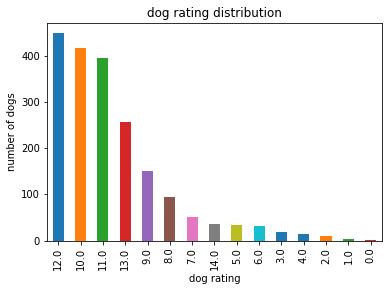

In [80]:
# distribution of dog ratings
x = df_final.rating_numerator.value_counts()
x.plot(kind='bar')
plt.title('dog rating distribution')
plt.xlabel('dog rating')
plt.ylabel('number of dogs');

#### 2. Visualization that shows the distibution of dog stages in the dataset

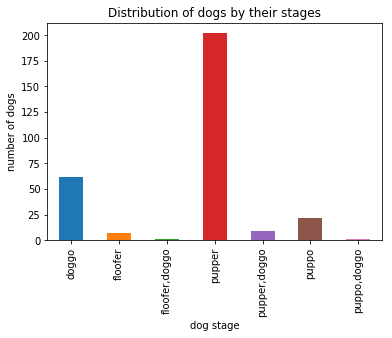

In [81]:
# most popular dog stages by rating
df_final.groupby('dog_stage')['rating_numerator'].count().plot(kind='bar')
plt.title('Distribution of dogs by their stages')
plt.xlabel('dog stage')
plt.ylabel('number of dogs');